---

## Interpretability vs. Explainability in Predictive Modeling

### Clarity in Model Decisions

---

**Understanding the Concepts:**
- **Interpretability:** The degree to which a human can understand the cause of a decision by the model. It often relates to the model's structure (e.g., linear models).
- **Explainability:** The extent to which the internal mechanics of a machine learning model can be explained in human terms. It includes post-hoc interpretations (e.g., Shapley values).

**Simple vs. Complex Models:**
- **Linear Models:** High interpretability, coefficients indicate the effect size of each feature (e.g., logistic regression in credit scoring).
- **Decision Trees:** Intuitive flowchart structure showing how decisions are made (e.g., classifying well performance).
- **Bayesian Models:** Probabilistic approach offering insights through posterior distributions.

---

## Why Interpretability and Explainability Matter

### Trust and Comprehension in High-Stakes Environments

---

**In Research:**
- **Transparency:** Facilitates peer review and validation of findings.
- **Reliability:** Assists in verifying model assumptions and identifying errors.

**In Industry - Commodity Trading:**
- **Trust:** Traders rely on model outputs for significant financial decisions (e.g., purchasing futures).
- **Regulatory Compliance:** Financial models must often be interpretable to comply with regulations (e.g., Basel III).

**Examples in Oil & Gas:**
- A logistic regression model might predict pipeline failure probabilities, with clear coefficients for factors like pressure and corrosion level.
- A Bayesian model could estimate the probability of finding oil in a new field, incorporating prior expert knowledge and new seismic data.

---

## Tradeoffs: Interpretability vs. Predictive Power

### Balancing Understandability with Model Performance

---

**The Tradeoff:**
- **Interpretability:** Simple models (linear models, decision trees) are easier to understand but may lack complexity to capture intricate patterns.
- **Predictive Power:** More complex models (deep learning, ensemble methods) can model non-linear relationships but are often seen as black boxes.

**Finding the Balance:**
- In research, a transparent model that offers insights is often preferred.
- In high-stakes industries like commodity trading, a balance is sought where the model is sufficiently interpretable to instill trust and meet regulations, yet powerful enough to provide accurate predictions.

**Oil & Gas Industry Considerations:**
- For financial risk modeling, a transparent model may be required for regulatory reasons, even if it is slightly less predictive.
- For predictive maintenance, the focus might shift towards predictive power to prevent costly equipment failures, using post-hoc explainability methods to maintain some level of transparency.


In [2]:
import pandas
data = pandas.read_csv("data/income_data.csv")

In [3]:
import statsmodels.formula.api as sma

In [5]:
model = sma.logit("target ~ sex + age", data=data).fit()

Optimization terminated successfully.
         Current function value: 0.501943
         Iterations 6


In [6]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: target           Pseudo R-squared: 0.091     
Date:               2024-11-13 12:40 AIC:              32693.5455
No. Observations:   32561            BIC:              32718.7181
Df Model:           2                Log-Likelihood:   -16344.   
Df Residuals:       32558            LL-Null:          -17974.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -3.6550   0.0533 -68.5316 0.0000 -3.7595 -3.5505
sex[T. Male]      1.2484   0.0349  35.7414 0.0000  1.1800  1.3169
age               0.0390   0.0010  38.9404 0.0000  0.0371  0.0410
=================================================================

"""

## Quick Digression: Bayesian models in Python

In [7]:
import pymc
import arviz as vz

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
male_high = data[data['sex'] == ' Male']['target'].sum()
female_high = data[data['sex'] == ' Female']['target'].sum()
n_males = data[data['sex'] == ' Male'].shape[0]
n_females = data[data['sex'] == ' Female'].shape[0]


In [12]:
with pymc.Model() as model:
    p_male = pymc.Beta('p_male', alpha=1, beta=1)
    p_female = pymc.Beta('p_female', alpha=1, beta=1)

    male_obs = pymc.Binomial('male_obs', n=n_males, p=p_male, observed=male_high)
    female_obs = pymc.Binomial('female_obs', n=n_females, p=p_female, observed=female_high)

    trace = pymc.sample(1000, tune=500, cores=4, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_male, p_female]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


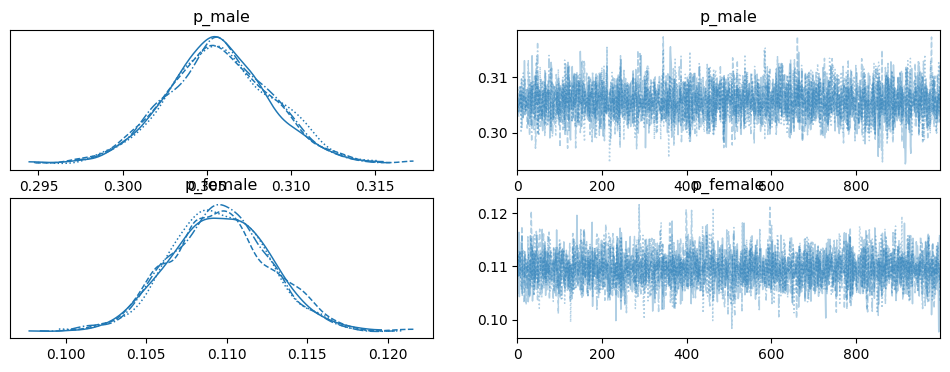

In [13]:
vz.plot_trace(trace)
None


# Interpretability

---

## Partial Dependency Plots (PDPs)

### Visualizing Feature Influence on Model Predictions

---

**Understanding PDPs:**
- Partial dependency plots show the relationship between a set of features and the predicted outcome.
- They help to visualize the marginal effect of a feature on the predicted result, averaged over a distribution of other features.

**Creating PDPs:**
- Fix a feature of interest at a range of values.
- Calculate the average prediction from the model over the distribution of the other features.

**Application in Commodity Trading:**
- PDPs can illustrate how changes in global oil supply affect predicted oil prices, holding other variables like political stability constant.
- Useful for sensitizing investment decisions to shifts in key market drivers.

---

## Shapley Values in Model Explainability

### Fair Attribution of Prediction Contributions

---


**Formula for Shapley Values:**
- The contribution of a feature value to a prediction is averaged over all possible combinations.
- For a feature `i` in a model with features `N`:

```plaintext
φᵢ(v) = Σ [(|S|!(|N| - |S| - 1)! / |N|!) * (f(S ∪ {i}) - f(S))]
```
*where `S` is a subset of features without `i`, `f(S)` is the model prediction without `i`, and `f(S ∪ {i})` is the prediction with `i`.*

**Concept of Shapley Values:**
- A method from cooperative game theory applied to explain the output of any machine learning model.
- It assigns a fair contribution value to each feature for a particular prediction.

**Shapley Value Calculation:**
- For each possible combination of features, the marginal contribution of a feature to the prediction is calculated.
- These contributions are then averaged to determine the Shapley value for each feature.

**Properties**

- **Equitable Distribution:** Shapley values impartially attribute a prediction's outcome to each feature, considering both *solo and interactive effects*.

- **Universality:** Applicable to any model type.

- **Individual-Level Insight:** Provide granular explanations for single predictions.

- **Theoretical Robustness:** Grounded in cooperative game theory.

- **Stable Consistency:** Shapley values maintain consistent feature importance rankings.

**Industry Relevance:**
- **Trading Models:** Shapley values can explain the influence of different market factors on the prediction of commodity prices.
- **Risk Assessment:** Quantifying the contribution of various risk factors to operational risks in oil extraction and distribution.

---


# Partial dependence

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
features = ['age', 'sex', 'occupation', 'education', 'race', 'hours-per-week']
vt = VarianceThreshold(0.15*(1-0.15))
feature_matrix = vt.fit_transform(
   pandas.get_dummies(data[features], drop_first=True))

In [33]:
feature_matrix

array([[39, 40,  1,  1,  0,  0],
       [50, 13,  1,  1,  0,  0],
       [38, 40,  1,  0,  1,  0],
       ...,
       [58, 40,  0,  0,  1,  0],
       [22, 20,  1,  0,  1,  0],
       [52, 40,  0,  0,  1,  0]])

In [34]:
X = pandas.DataFrame(feature_matrix, columns=vt.get_feature_names_out())

In [35]:
X

,age,hours-per-week,sex_ Male,education_ Bachelors,education_ HS-grad,education_ Some-college
0,39,40,1,1,0,0
1,50,13,1,1,0,0
2,38,40,1,0,1,0
3,53,40,1,0,0,0
4,28,40,0,1,0,0
...,...,...,...,...,...,...
32556,27,38,0,0,0,0
32557,40,40,1,0,1,0
32558,58,40,0,0,1,0
32559,22,20,1,0,1,0


In [36]:
y = data['target']

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X, y)

In [38]:
from sklearn.inspection import PartialDependenceDisplay

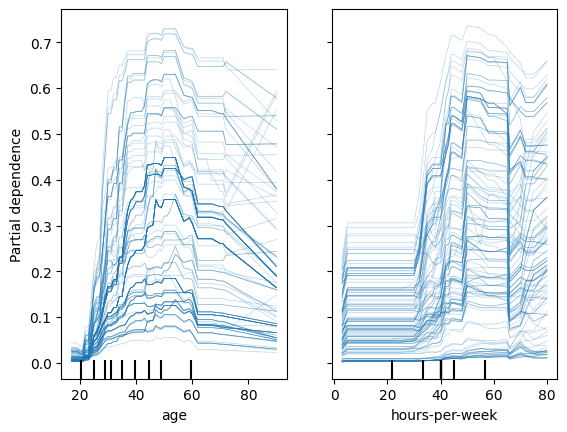

In [39]:
PartialDependenceDisplay.from_estimator(
    gbc, X.sample(150), ['age', 'hours-per-week'], kind='individual')

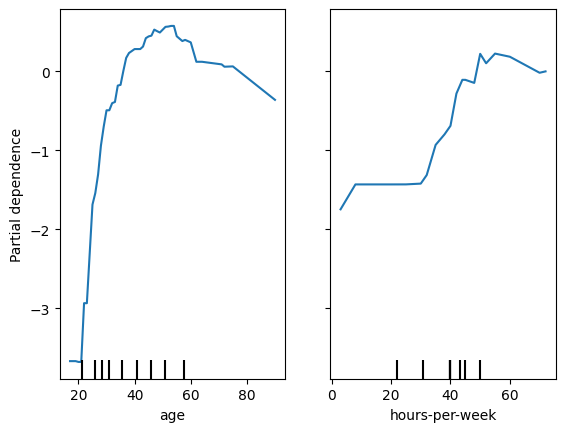

In [40]:
PartialDependenceDisplay.from_estimator(
    gbc, X.sample(100), ['age', 'hours-per-week'])

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X, y)

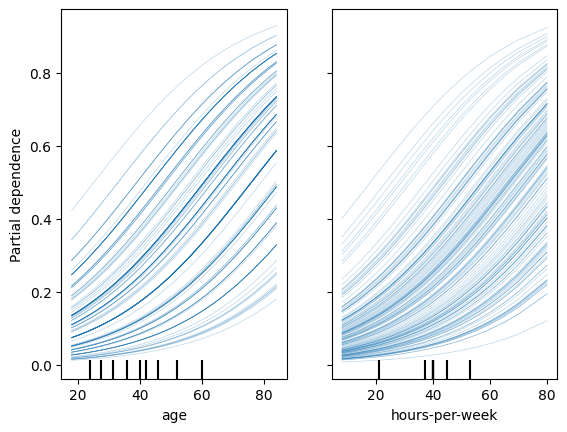

In [42]:
PartialDependenceDisplay.from_estimator(
    log_reg, X.sample(150), ['age', 'hours-per-week'], kind='individual')

# Shapley Values

In [43]:
import shap

In [44]:
!python --version

Python 3.11.6


In [45]:
shap.initjs()

In [46]:
explainer = shap.Explainer(log_reg, X)
shap_values = explainer(X.sample(1_000))

In [47]:
# individual data points
shap.force_plot(shap_values[5])

In [49]:
X.columns

Index(['age', 'hours-per-week', 'sex_ Male', 'education_ Bachelors',
       'education_ HS-grad', 'education_ Some-college'],
      dtype='object')

In [50]:
shap.force_plot(shap_values[15])

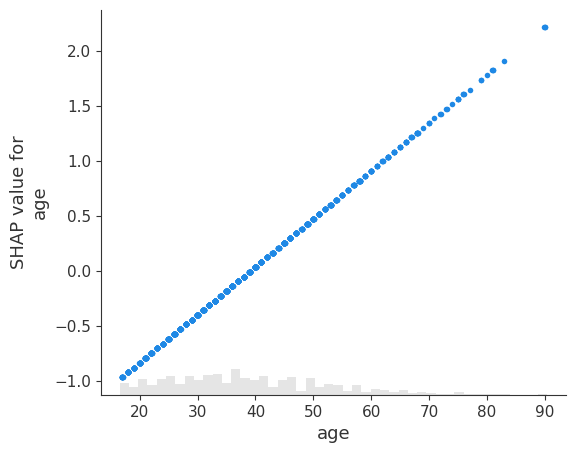

In [51]:
shap.plots.scatter(shap_values[:, 'age'])

In [52]:
boosted_explainer = shap.Explainer(gbc, X)
boosted_shap_values = boosted_explainer(X.sample(1_000))

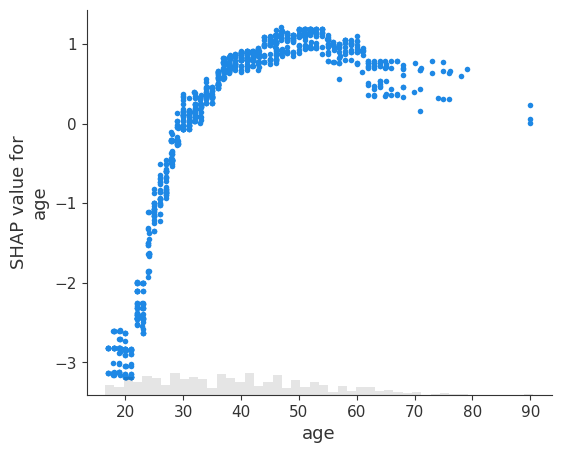

In [53]:
shap.plots.scatter(boosted_shap_values[:, 'age'])

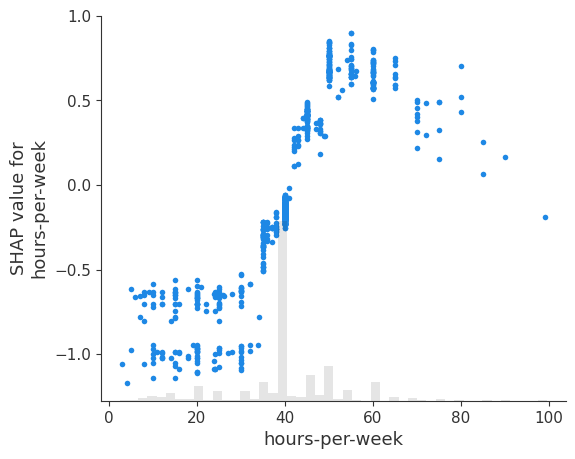

In [54]:
shap.plots.scatter(boosted_shap_values[:, 'hours-per-week'])

In [55]:
shap.force_plot(boosted_shap_values[10])

In [57]:
shap.force_plot(boosted_shap_values[20])